In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
import random
import math
import joblib

Untitled.ipynb archive        hw3_ (1).ipynb


In [9]:
train_data = pd.read_csv(r"archive/fashion-mnist_train.csv")
test_data = pd.read_csv(r"archive/fashion-mnist_test.csv")

X = train_data[train_data.columns[1:]]
y = train_data['label']

X_test = test_data[test_data.columns[1:]]
y_test = test_data['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/6, stratify=y,random_state=42)

X_train.reset_index(inplace=True,drop=True)
y_train = y_train.reset_index(drop=True)
X_val.reset_index(inplace=True,drop=True)
y_val = y_val.reset_index(drop=True)

In [11]:
y_cols = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

print("Length of train and validation set respectively: ")
len(X_train),len(X_val)

Length of train and validation set respectively: 


(50000, 10000)

In [12]:
def display_img(data_df:pd.DataFrame):
    display_df = data_df.sample(n=20)
    fig, axs = plt.subplots(4,5, figsize=(15, 6))
    fig.subplots_adjust(hspace = .5, wspace=.005)

    axs = axs.ravel()
    X_cols = display_df.columns[1:]
    for i in range(20):
        axs[i].imshow(np.expand_dims(display_df.iloc[i][X_cols].values,1).reshape((28,28)),cmap="Greys")
        axs[i].set_title(f"{y_cols[display_df.iloc[i]['label']]}")

## PLOTTING DATA BEFORE PCA

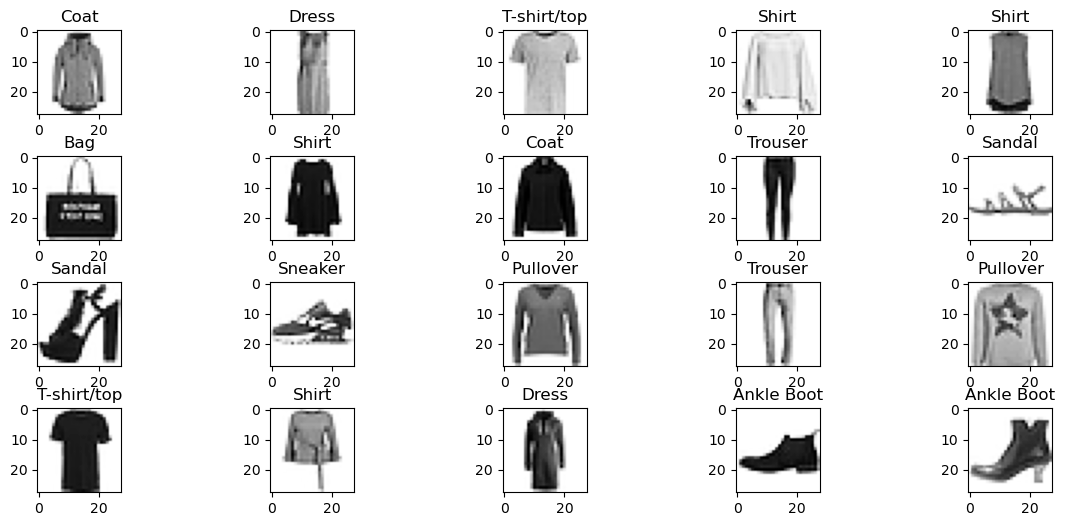

In [13]:
display_img(train_data)

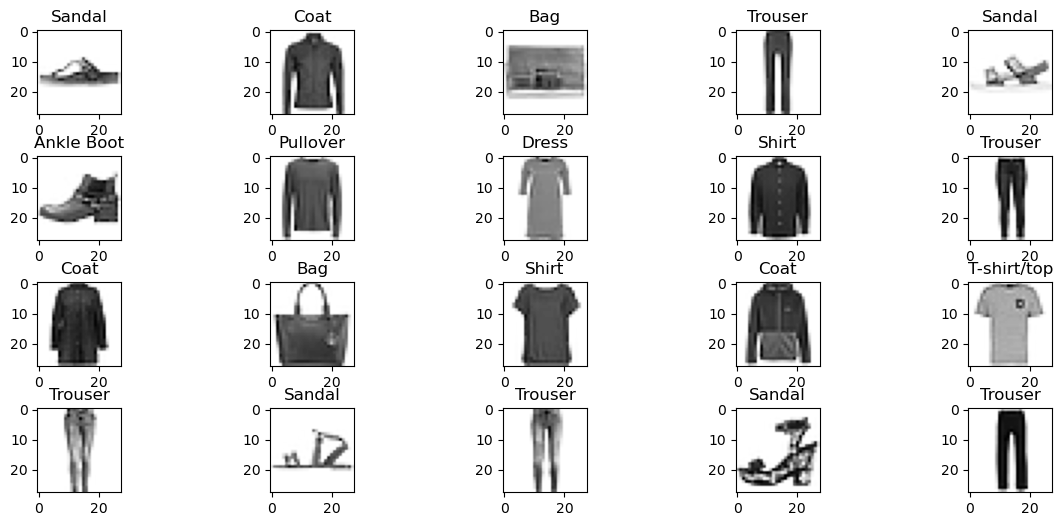

In [14]:
display_img(test_data)

## RANDOM FOREST CLASSIFIER FOR THE DATASET WITHOUT PCA

In [15]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [16]:
start = time.time()
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42)

rf_model.fit(X_train,y_train)
print(f"It took {round(time.time()-start,3)} seconds")

It took 9.124 seconds


In [17]:
print("Validation accuracy of RF Model: ",rf_model.score(X_val,y_val))
print("Test accuracy of RF Model: ",rf_model.score(X_test,y_test))

Validation accuracy of RF Model:  0.8759
Test accuracy of RF Model:  0.8833


## APPLYING PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_scaled = pca.fit_transform(X_train)

In [19]:
plt.style.use('ggplot')
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

## 95% EXPLAINED VARIANCE

In [20]:
#Getting the required number of PCA components that explain 95% of the variance
req_comp = np.where(cum_var>=0.95)[0][0] + 1
print(f"The number of required PCA components: ",req_comp)

The number of required PCA components:  187


Text(0, 0.5, 'Cumulative Explained Variance')

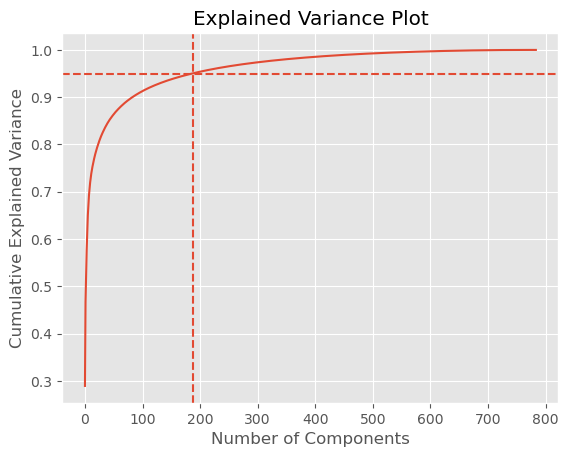

In [21]:
plt.style.use("ggplot")
plt.plot(cum_var)
plt.axhline(0.95,linestyle='--')
plt.axvline(req_comp,linestyle='--')
plt.title("Explained Variance Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [22]:
pca_trans = PCA(n_components=req_comp)

X_train_scaled = pca_trans.fit_transform(X_train)
X_val_scaled = pca_trans.transform(X_val)
X_test_scaled = pca_trans.transform(X_test)

In [23]:
X_recovered_train = pca_trans.inverse_transform(X_train_scaled)
X_recovered_val = pca_trans.inverse_transform(X_val_scaled)

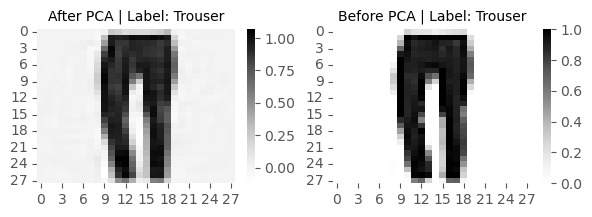

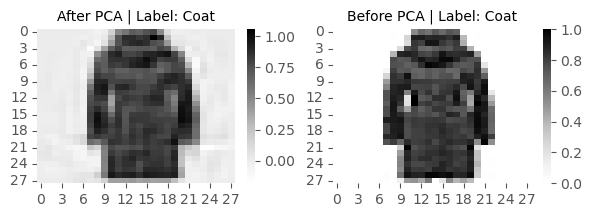

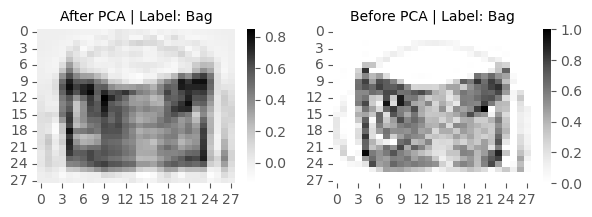

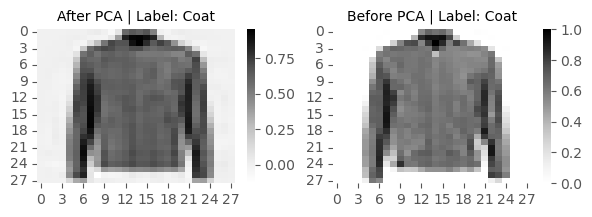

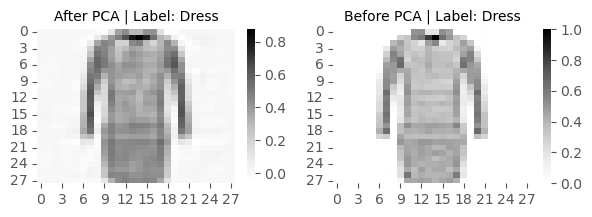

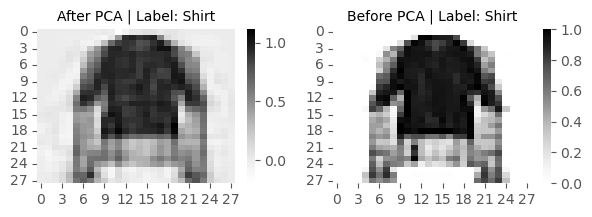

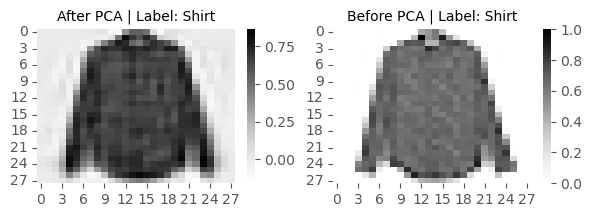

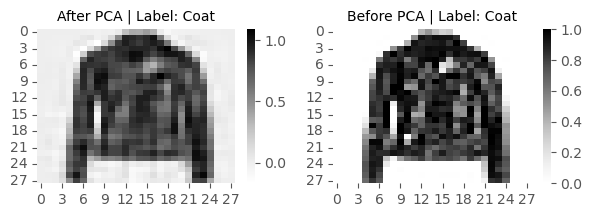

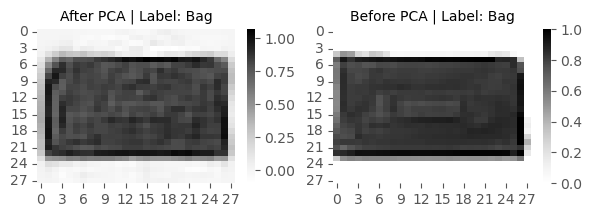

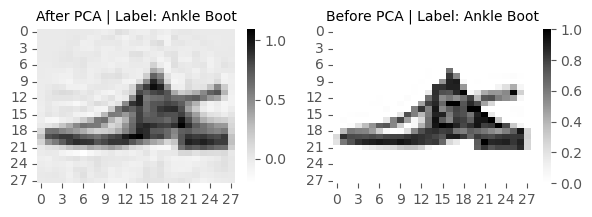

In [24]:
random_idxs = np.random.randint(low=0,high=len(X_train),size=10)

for idx in random_idxs:
    fig, axs = plt.subplots(1, 2, figsize=(7, 2))
    sns.heatmap(X_train.loc[idx].values.reshape(28,28),ax=axs[1],cmap='Greys')
    sns.heatmap(X_recovered_train[idx].reshape(28,28),ax=axs[0],cmap='Greys')
    axs[0].set_title(f"After PCA | Label: {y_cols[y_train[idx]]}",fontsize=10)
    axs[1].set_title(f"Before PCA | Label: {y_cols[y_train[idx]]}",fontsize=10)

In [26]:
start = time.time()
pca_rf_model = RandomForestClassifier(n_jobs=-1,random_state=42)
pca_rf_model.fit(X_train_scaled,y_train)
print(f"It took {round(time.time()-start,2)} seconds")

It took 14.43 seconds


In [27]:
print("Validation accuracy of RF Model: ",pca_rf_model.score(X_val_scaled,y_val))
print("Test accuracy of RF Model: ",pca_rf_model.score(X_test_scaled,y_test))

Validation accuracy of RF Model:  0.8599
Test accuracy of RF Model:  0.8625


## EXPLAINED VARIANCE FROM FIRST TWO COMPONENTS

## PCA PLOTS

In [139]:
comps = 2
print(f"Variance explained by first two {comps} is {round(sum(pca_2d.explained_variance_ratio_),3)} ")

Variance explained by first two 2 is 0.467 


Use PCA to reduce dimensionality to only 2 dimensions

In [158]:
# pca_2d = PCA(n_components=2)
# X_train_2d = pca_2d.fit_transform(X_train)

pca_2D = PCA(n_components=2) # n_components=2 reduces the number of features to 2
X_2D_PCA = pd.DataFrame(pca_2D.fit_transform(X_train),columns=['x','y'])

In [140]:
import random
num_images = 1000
comb_list = list(zip(X_train_2d,y_train))
selected_list = random.sample(comb_list,num_images)
X_2d_plot = [td for (td,l) in selected_list]
y_2d_plot = [l for (td,l) in selected_list]

In [141]:
X_2d_plot = np.array(X_2d_plot)
y_2d_plot = np.array(y_2d_plot)

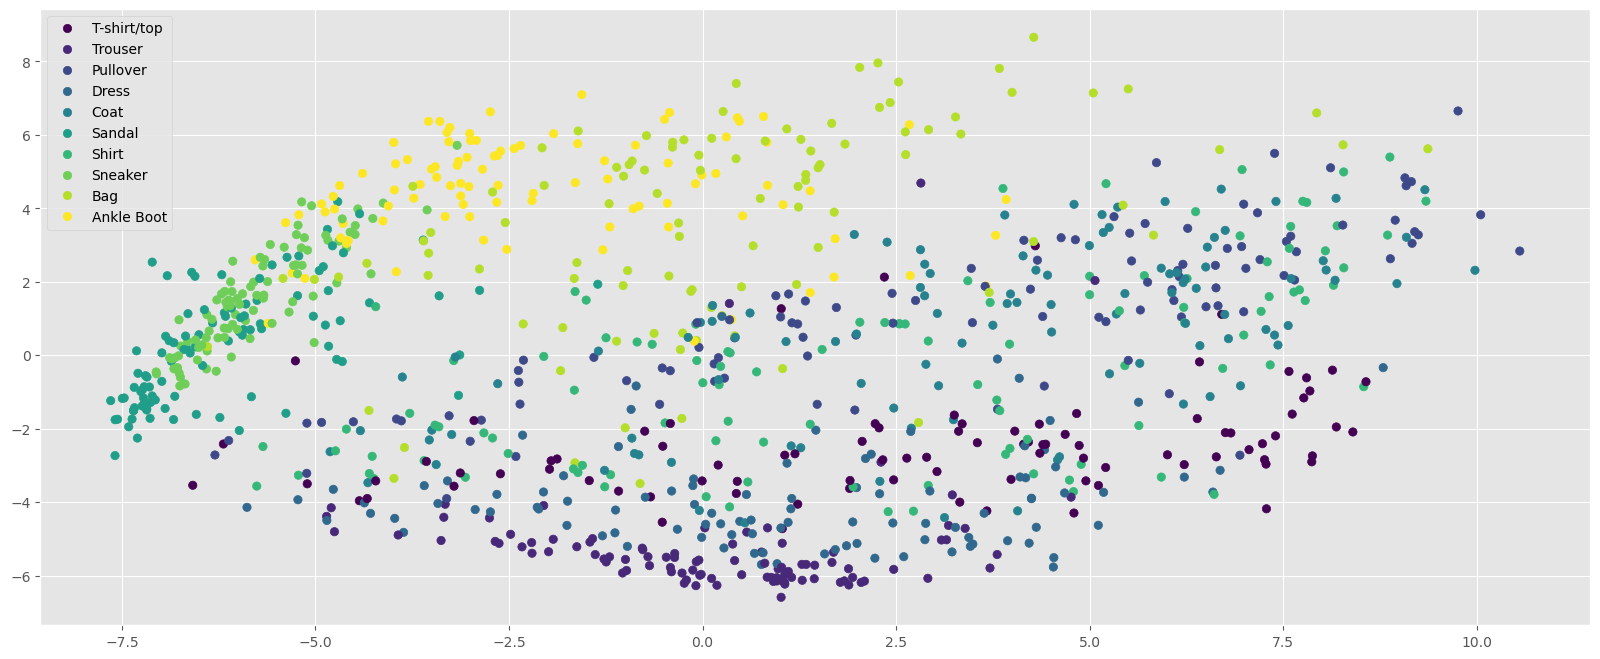

In [142]:
plt.figure(figsize=(20,8))
ax = plt.scatter(X_2d_plot[:,0],X_2d_plot[:,1],c=y_2d_plot,label=y_cols)
plt.legend(handles=ax.legend_elements()[0], labels=y_cols)

In [147]:
def getImage(image_data):
    return OffsetImage(pca_2d.inverse_transform(image_data).reshape(28,28),cmap='gray')

In [148]:
from matplotlib.offsetbox import AnnotationBbox,OffsetImage

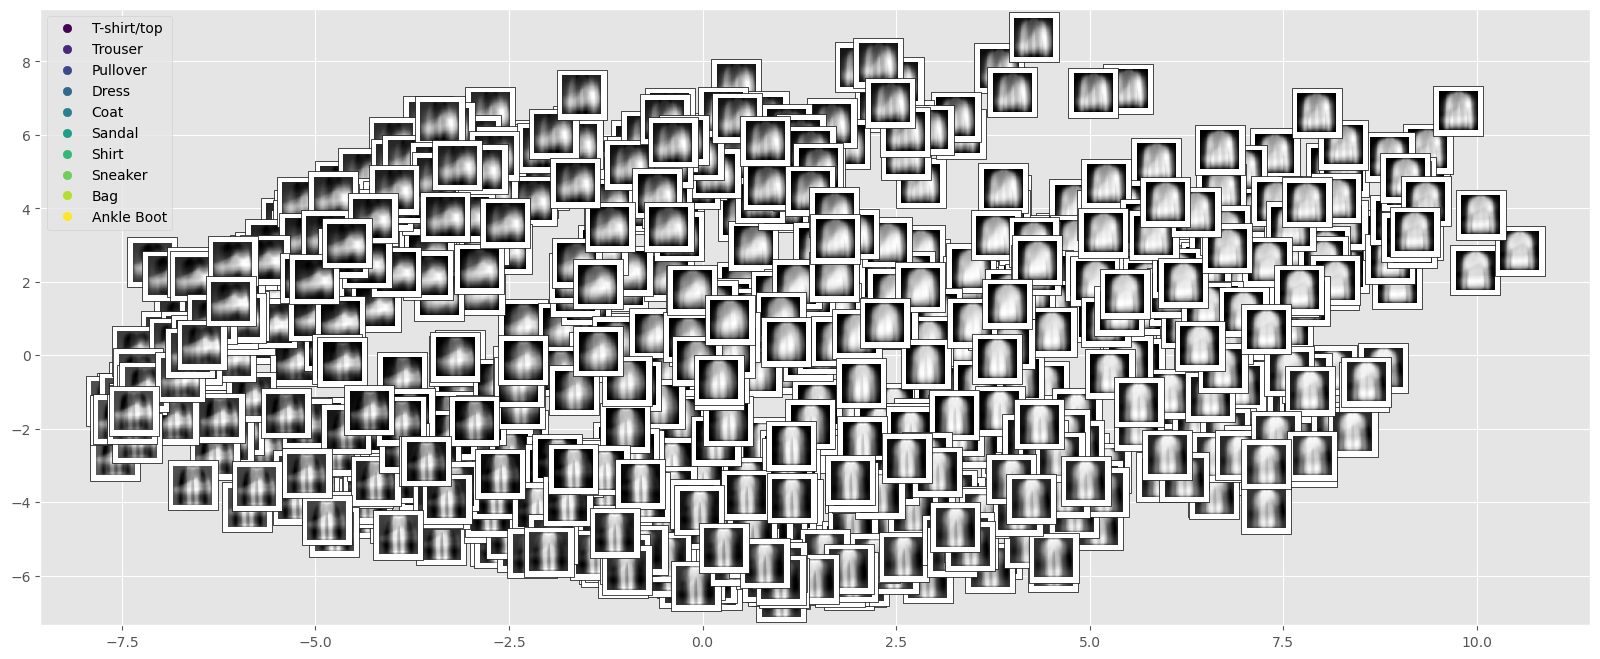

In [149]:
fig, ax = plt.subplots(figsize=(20,8))
scatter = ax.scatter(X_2d_plot[:,0], X_2d_plot[:,1], c=y_2d_plot,label=y_cols)
legend = ax.legend(handles=scatter.legend_elements()[0], labels=y_cols)
for x0, y0, image in zip(X_2d_plot[:,0], X_2d_plot[:,1], X_2d_plot):
     ab = AnnotationBbox(getImage(image), (x0, y0))
     ax.add_artist(ab)
plt.show()

In [150]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(projection='3d')
# axs = ax.scatter(X_2d_plot[:,0],X_2d_plot[:,1],c=y_2d_plot,label=y_cols)
# plt.legend(handles=axs.legend_elements()[0], labels=y_cols)

## T-SNE

In [157]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=50)

X_tsne = tsne.fit_transform(X_train)

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_train)
X_2D_TSNE = pd.DataFrame(X_embedded,columns=['x','y'])

KeyboardInterrupt: 

In [ ]:
import numpy as np

with open('TSNE.npy', 'wb') as f:
    np.save(f, X_tsne,allow_pickle=True)

with open('TSNE.npy', 'rb') as f:
    X_tsne = np.load(f,allow_pickle=True)

In [ ]:
num_images = 1000

comb_list = list(zip(X_tsne,y_train))
selected_list = random.sample(comb_list,num_images)
X_2d_plot_tsne = [td for (td,l) in selected_list]
y_2d_plot_tsne = [l for (td,l) in selected_list]

In [ ]:
X_2d_plot_tsne = np.array(X_2d_plot_tsne)
y_2d_plot_tsne = np.array(y_2d_plot_tsne)

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.scatter(X_2d_plot_tsne[:,0],X_2d_plot_tsne[:,1],c=y_2d_plot_tsne,label=y_cols)
plt.legend(handles=ax.legend_elements()[0], labels=y_cols)

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
axs = ax.scatter(X_2d_plot_tsne[:,0],X_2d_plot_tsne[:,1],c=y_2d_plot_tsne,label=y_cols)
plt.legend(handles=axs.legend_elements()[0], labels=y_cols)
plt.title("T-SNE")

## LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_jobs=-1)

X_lle = lle.fit_transform(X_train)

In [ ]:
import numpy as np

with open('LLE.npy', 'wb') as f:
    np.save(f, X_lle,allow_pickle=True)

with open('LLE.npy', 'rb') as f:
    X_lle = np.load(f,allow_pickle=True)

In [ ]:
num_images = 1000

comb_list = list(zip(X_lle,y_train))
selected_list = random.sample(comb_list,num_images)
X_2d_plot_lle = [td for (td,l) in selected_list]
y_2d_plot_lle = [l for (td,l) in selected_list]

X_2d_plot_lle = np.array(X_2d_plot_lle)
y_2d_plot_lle = np.array(y_2d_plot_lle)

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.scatter(X_2d_plot_lle[:,0],X_2d_plot_lle[:,1],c=y_2d_plot_lle,label=y_cols)
plt.legend(handles=ax.legend_elements()[0], labels=y_cols)

## MDS

In [ ]:
from sklearn.manifold import MDS
import random
mds = MDS()
X_mds = mds.fit_transform(X_train.sample(frac=1/50,random_state=42))

In [ ]:
import numpy as np

with open('MDS.npy', 'wb') as f:
    np.save(f, X_mds,allow_pickle=True)

with open('MDS.npy', 'rb') as f:
    X_mds = np.load(f,allow_pickle=True)

In [ ]:
num_images = 1000

comb_list = list(zip(X_mds.tolist(),y_train))
selected_list = random.sample(comb_list,num_images)
X_2d_plot_mds = [td for (td,l) in selected_list]
y_2d_plot_mds = [l for (td,l) in selected_list]

X_2d_plot_mds = np.array(X_2d_plot_mds)
y_2d_plot_mds = np.array(y_2d_plot_mds)

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.scatter(X_2d_plot_mds[:,0],X_2d_plot_mds[:,1],c=y_2d_plot_mds,label=y_cols)
plt.legend(handles=ax.legend_elements()[0], labels=y_cols)

## KMeans

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
train = pd.concat([X_train_scaled_df,y_train],axis=1)

sample_data = train.groupby('label').apply(lambda x:x.sample(frac=1/5)).reset_index(drop=True)

In [ ]:
sample_data['label'].value_counts(normalize=True)

In [ ]:
sample_data = sample_data.sample(frac=1)
X_knn_train = sample_data[sample_data.columns[:-1]]
y_knn_train = sample_data['label']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm

In [ ]:
num_clusters = [i for i in range(5,51)]

kmeans_dicts = {}
for clusters in tqdm(num_clusters):
    kmeans = KMeans(n_clusters=clusters,random_state=42)
    kmeans.fit(X_knn_train)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_knn_train, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_knn_train, cluster_labels)
    kmeans_dicts.update({str(clusters):[kmeans.inertia_,silhouette_avg,sample_silhouette_values]})

In [ ]:
import pickle 

with open('KMeans.pkl', 'wb') as f:
    pickle.dump(kmeans_dicts, f)
        
with open('KMeans.pkl', 'rb') as f:
    kmeans_dicts = pickle.load(f)

In [ ]:
inertia_vals = [val[0] for val in kmeans_dicts.values()]
silhoutte_coeffs = [val[1] for val in kmeans_dicts.values()]

In [ ]:
num_clusters = [str(i) for i in num_clusters]
plt.figure(figsize=(20,8))
plt.plot(num_clusters,inertia_vals)
plt.xlabel("Number of Centroids")
plt.ylabel("Inertia Values")
plt.title("Inertia Values vs. Number of Centroids")

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(num_clusters,silhoutte_coeffs)
plt.xlabel("Number of Centroids")
plt.ylabel("Silhoutte Coefficients")
plt.title("Silhoutte Coefficients vs. Number of Centroids")

In [ ]:
print(f"The best number of clusters is {5+np.argmax(silhoutte_coeffs)}")

In [ ]:
sample_data = train.groupby('label').apply(lambda x:x.sample(frac=1/50)).reset_index(drop=True)
sample_data = sample_data.sample(frac=1)
X_sub_knn_train = sample_data[sample_data.columns[:-1]]
y_sub_knn_train = sample_data['label']

In [ ]:
import matplotlib.cm as cm

def plot_silhoutte(n_clusters:int,X):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer.fit(X_knn_train)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    for idx,y in enumerate(y_cols):
        ax2 = plt.gca()
        sub_df = sample_data[sample_data.label==idx]
        sub_vals = sub_df.values
        ax2.scatter(sub_vals[:,0],sub_vals[:,1],label=y, marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
   
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.legend()
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.show()

In [ ]:
plot_silhoutte(9,X_sub_knn_train.values)

In [ ]:
plot_silhoutte(8,X_sub_knn_train.values)

In [ ]:
plot_silhoutte(10,X_sub_knn_train.values)

## VISUALIZE IN CLUSTERS IMAGES 

In [ ]:
best_kmeans = KMeans(n_clusters=8)
best_kmeans.fit(X_knn_train)

cluster_labels = best_kmeans.predict(X_knn_train)

In [ ]:
knn_train_df = pd.DataFrame(X_knn_train,columns=[i for i in range(X_train_scaled.shape[1])])
knn_train_df['label'] = y_knn_train
knn_train_df['kmeans_label'] = cluster_labels

In [ ]:
num_imgs = 5
for klabels in knn_train_df.groupby("kmeans_label"):
    klabels_ = klabels[1]
    X_vals = klabels_[klabels_.columns[:-2]].values
    X_vals = pca_trans.inverse_transform(X_vals)
    y_vals = klabels_['label'].values
    fig,ax = plt.subplots(1,num_imgs,figsize=(20,5))
    print(f"Cluster {klabels[0]}")
    for i in range(num_imgs):
        sns.heatmap(X_vals[i].reshape(28,28),cmap='Greys',ax=ax[i])
        ax[i].set_title(f"True Label: {y_cols[y_vals[i]]}",fontsize=10)
    plt.show()

## GAUSSIAN MIXTURE MODELS

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
train = pd.concat([X_train_scaled_df,y_train],axis=1)
sample_data_gmm = train.groupby('label').apply(lambda x:x.sample(frac=1/5,random_state=42)).reset_index(drop=True)
X_sub_gmm = sample_data_gmm[sample_data_gmm.columns[:-1]]
y_sub_gmm = sample_data_gmm['label']

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_full = GaussianMixture(n_components=10,n_init=5,covariance_type="full")
gmm_diag = GaussianMixture(n_components=10,n_init=5,covariance_type="diag")
gmm_tied = GaussianMixture(n_components=10,n_init=5,covariance_type="tied")
gmm_spherical = GaussianMixture(n_components=10,n_init=5,covariance_type="spherical")

In [ ]:
def save_dictionary(name:str,dicts_):
    import pickle 

    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(dicts_, f)
def read_dictionary(name:str):        
    with open(f'{name}.pkl', 'rb') as f:
        dicts_ = pickle.load(f)
    return dicts_

In [ ]:
from tqdm import tqdm
def get_gaussian_mixture(k_min=5,k_max=20,covariance_type='full'):
    model_gmms = {}
    model_bics = {}
    model_aics = {}
    for n_components in tqdm(range(k_min,k_max+1)):
        gmm_model = GaussianMixture(n_components=n_components,covariance_type=covariance_type,n_init=5).fit(X_sub_gmm)
        model_gmms.update({str(n_components):gmm_model})
        model_bics.update({str(n_components):gmm_model.bic(X_sub_gmm)})
        model_aics.update({str(n_components):gmm_model.aic(X_sub_gmm)})
    plt.figure(figsize=(20,8))
    plt.plot(model_bics.keys(),model_bics.values(),label='BIC')
    plt.plot(model_aics.keys(),model_aics.values(),label='AIC')
    plt.ylabel('Information Criterion')
    plt.xlabel("Number of Clusters")
    plt.legend()
    plt.title(f'{covariance_type} GMM model')
    plt.show()
    
    plt.savefig(f'{covariance_type}.png')

    return model_gmms,model_bics,model_aics

In [ ]:
#This cell took around 32 minutes to run, the output was cleared during plotting
full_model_gmm,full_bic,full_aic = get_gaussian_mixture(k_min=5,k_max=20)

In [ ]:
#48 seconds
spherical_model_gmm,spherical_bic,spherical_aic = get_gaussian_mixture(k_min=5,k_max=20,covariance_type='spherical')

save_dictionary('AIC_SPHERICAL',spherical_aic)
save_dictionary('BIC_SPHERICAL',spherical_bic)

In [ ]:
#2 mniutes 8 seconds
diag_model_gmm,diag_bic,diag_aic = get_gaussian_mixture(k_min=5,k_max=20,covariance_type='diag')

save_dictionary('AIC_DIAG',diag_aic)
save_dictionary('BIC_DIAG',diag_bic)

In [ ]:
tied_model_gmm,tied_bic,tied_aic = get_gaussian_mixture(k_min=5,k_max=20,covariance_type='tied')

save_dictionary('AIC_TIED',tied_aic)
save_dictionary('BIC_TIED',tied_bic)

##### THE `COVARIANCE_TYPE=FULL` GAVE THE BEST RESULTS WITH NUMBER OF `CLUSTERS=9`

In [ ]:
best_gmm_model_full = GaussianMixture(n_components=9,n_init=5).fit(X_sub_gmm)

In [ ]:
gmm_samples = best_gmm_model_full.sample(20)
X_sample,y_sample = gmm_samples

In [ ]:
X_sample_recoverd = pca_trans.inverse_transform(X_sample)

In [ ]:
for idx in range(20):
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    sns.heatmap(X_sample_recoverd[idx].reshape(28,28),ax=axs,cmap='Greys')
    axs.set_title(f"Generated Image | True Label: {y_cols[y_sample[idx]]}",fontsize=10)

In [ ]:
gmm_plot_df = pd.concat([X_sub_gmm,y_sub_gmm],axis=1)
gmm_plot_df = gmm_plot_df.sample(frac=0.1,random_state=42)
X_gmm_plot = gmm_plot_df[gmm_plot_df.columns[:-1]]
y_gmm_plot = gmm_plot_df['label']

In [ ]:
gmm_plot_df['gmm_predicted_label'] = best_gmm_model_full.predict(X_gmm_plot)

In [ ]:
num_clusters = 9

y_gmm_cols = [str(i) for i in range(num_clusters)]

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)

for idx,y in enumerate(y_gmm_cols):
    # ax1 = plt.gca()
    sub_df = gmm_plot_df[gmm_plot_df.gmm_predicted_label==idx]
    sub_vals = sub_df.values
    ax1.scatter(sub_vals[:,0],sub_vals[:,1],label=y, marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
ax1.legend()
ax1.set_title('Gaussian Mixture Model Prediction Clusters')

for idx,y in enumerate(y_cols):
    # ax2 = plt.gca()
    sub_df = gmm_plot_df[gmm_plot_df.label==idx]
    sub_vals = sub_df.values
    ax2.scatter(sub_vals[:,0],sub_vals[:,1],label=y, marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
ax2.set_title('True Class Scatter Plot')
ax2.legend()
plt.show()

In [ ]:
num_imgs = 5
for idx,y in enumerate(y_gmm_cols):
    # ax1 = plt.gca()
    sub_df = gmm_plot_df[gmm_plot_df.gmm_predicted_label==idx]
    sub_df = sub_df.sample(n=num_imgs)
    X_df = sub_df[sub_df.columns[:-2]].values
    X_df = pca_trans.inverse_transform(X_df)
    # print(X_df.shape)
    y_df = sub_df['label'].values
    fig,ax = plt.subplots(1,num_imgs,figsize=(20,5))
    print(f"Cluster {idx}")
    for i in range(num_imgs):
        sns.heatmap(X_df[i].reshape(28,28),cmap='Greys',ax=ax[i])
        ax[i].set_title(f"True Label: {y_cols[y_df[i]]}",fontsize=10)
    plt.show()

## NEURAL NETWORKS IMPLEMENTATION

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from IPython.display import clear_output
lrs = [0.1,0.001,0.00001]
lr_dict = {}
for lr in lrs:
    model = keras.Sequential([
    keras.layers.Dense(200, activation='ReLU'),
    keras.layers.Dense(50, activation='ReLU'),
    keras.layers.Dense(10, activation='softmax')
        ])
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=1)
    lr_dict.update({str(lr):history})
    clear_output(wait=True)

In [ ]:
plt.style.use('ggplot')
def plot_dictionary(lr_dict,save_name:str):
  dict_keys = [k for k in lr_dict.keys()]
  
  fig, axs = plt.subplots(3, 2,sharex=True)
  fig.set_size_inches(20,15)

  axs[0,0].plot(lr_dict[dict_keys[0]].history['loss'],label='Training Loss')
  axs[0,0].plot(lr_dict[dict_keys[0]].history['val_loss'],label='Validation Loss')
  axs[0,1].plot(lr_dict[dict_keys[0]].history['accuracy'],label='Training Accuracy')
  axs[0,1].plot(lr_dict[dict_keys[0]].history['val_accuracy'],label='Validation Loss')
  axs[0,0].set_title(f'Loss for learning rate {dict_keys[0]}')
  axs[0,1].set_title(f'Accuracy for learning rate {dict_keys[0]}')
  axs[0,0].set_xlabel('Epochs')
  axs[0,1].set_xlabel('Epochs')
  axs[0,0].set_ylabel('Loss')
  axs[0,1].set_ylabel('Accuracy')
  axs[0,0].legend()
  axs[0,1].legend()

  axs[1,0].plot(lr_dict[dict_keys[1]].history['loss'],label='Training Loss')
  axs[1,0].plot(lr_dict[dict_keys[1]].history['val_loss'],label='Validation Loss')
  axs[1,1].plot(lr_dict[dict_keys[1]].history['accuracy'],label='Training Accuracy')
  axs[1,1].plot(lr_dict[dict_keys[1]].history['val_accuracy'],label='Validation Loss')
  axs[1,0].set_title(f'Loss for learning rate {dict_keys[1]}')
  axs[1,1].set_title(f'Accuracy for learning rate {dict_keys[1]}')
  axs[1,0].set_xlabel('Epochs')
  axs[1,1].set_xlabel('Epochs')
  axs[1,0].set_ylabel('Loss')
  axs[1,1].set_ylabel('Accuracy')
  axs[1,0].legend()
  axs[1,1].legend()

  axs[2,0].plot(lr_dict[dict_keys[2]].history['loss'],label='Training Loss')
  axs[2,0].plot(lr_dict[dict_keys[2]].history['val_loss'],label='Validation Loss')
  axs[2,1].plot(lr_dict[dict_keys[2]].history['accuracy'],label='Training Accuracy')
  axs[2,1].plot(lr_dict[dict_keys[2]].history['val_accuracy'],label='Validation Loss')
  axs[2,0].set_title(f'Loss for learning rate {dict_keys[2]}')
  axs[2,1].set_title(f'Accuracy for learning rate {dict_keys[2]}')
  axs[2,0].set_xlabel('Epochs')
  axs[2,1].set_xlabel('Epochs')
  axs[2,0].set_ylabel('Loss')
  axs[2,1].set_ylabel('Accuracy')
  axs[2,0].legend()
  axs[2,1].legend()

  plt.show()
  plt.savefig(f'{save_name}.png')

plot_dictionary(lr_dict,'ReLU')

In [ ]:
from IPython.display import clear_output

lrs = [0.1,0.001,0.00001]
lr_dict_linear = {}
for lr in lrs:
    model_linear = keras.Sequential([
    keras.layers.Dense(200, activation='linear'),
    keras.layers.Dense(50, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
        ])
    model_linear.compile(loss='sparse_categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    history = model_linear.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=1)
    lr_dict_linear.update({str(lr):history})
    clear_output(wait=True)

In [ ]:
plot_dictionary(lr_dict_linear,'Linear')

In [ ]:
model_relu = keras.Sequential([
    keras.layers.Dense(200, activation='ReLU'),
    keras.layers.Dense(50, activation='ReLU'),
    keras.layers.Dense(10, activation='softmax')
        ])
model_relu.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])
history = model_relu.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=0)

In [ ]:
model_relu.evaluate(X_test,  y_test, verbose=2)

In [ ]:
model_linear = keras.Sequential([
    keras.layers.Dense(200, activation='linear'),
    keras.layers.Dense(50, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
        ])
model_linear.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])
history = model_linear.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=1)

In [ ]:
model_linear.evaluate(X_test,  y_test, verbose=2)

In [ ]:
print(model_relu.summary())

In [ ]:
num_biases = model_relu.layers[0].get_weights()[1].shape[0] + model_relu.layers[1].get_weights()[1].shape[0] + model_relu.layers[2].get_weights()[1].shape[0]

print("Number of bias parameters = ",num_biases)